In [14]:
#import libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [15]:
#load dataset
df = pd.read_csv('/content/BTC-USD (7).csv')

In [16]:
#normalization
data= df.filter(['Close'])
dataset=data.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.95192733],
       [0.82155886],
       [0.82851896],
       [0.84322381],
       [0.89434288],
       [0.96955973],
       [0.87945083],
       [0.9146235 ],
       [0.80805786],
       [0.90765547],
       [0.83807772],
       [0.85254107],
       [0.90824208],
       [0.83171534],
       [0.86649665],
       [0.86067194],
       [0.84223169],
       [0.8022661 ],
       [0.81397031],
       [0.85339896],
       [0.9958813 ],
       [1.        ],
       [0.87546222],
       [0.91722461],
       [0.86954599],
       [0.87757618],
       [0.88218398],
       [0.97365586],
       [0.9602105 ],
       [0.90140878],
       [0.89501345],
       [0.83077155],
       [0.7855986 ],
       [0.68574484],
       [0.41862502],
       [0.4010933 ],
       [0.42396404],
       [0.28705771],
       [0.29267045],
       [0.20183399],
       [0.29778066],
       [0.30067135],
       [0.30761046],
       [0.26240164],
       [0.33105805],
       [0.34016639],
       [0.35707868],
       [0.327

In [17]:
#Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data= data[:train_size]
test_data=data[train_size:]        

In [18]:
# Create the input and output data
def create_dataset(dataset):
    dataX,dataY = [], []
    for i in range(len(dataset)-30):
        dataX.append(dataset.iloc[i:(i+30)])
        dataY.append(dataset.iloc[i + 30])
    return np.array(dataX), np.array(dataY)

trainX, trainY = create_dataset(train_data)
testX, testY = create_dataset(test_data)       

In [19]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=30))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mape')


In [20]:
# Train the model
history=model.fit(trainX, trainY, epochs=100, batch_size=32)


Epoch 1/100
9/9 [==============================] - 1s 4ms/step - loss: 46.2771
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 14.7789
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 11.0217
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 11.4494
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 8.7204
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 7.7628
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 7.2720
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 6.6025
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 5.5324
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 5.0868
Epoch 11/100
9/9 [==============================] - 0s 3ms/step - loss: 4.7907
Epoch 12/100
9/9 [==============================] - 0s 3ms/step - loss: 4.3872
Epoch 13/100
9/9 [==============================] - 0s 3m

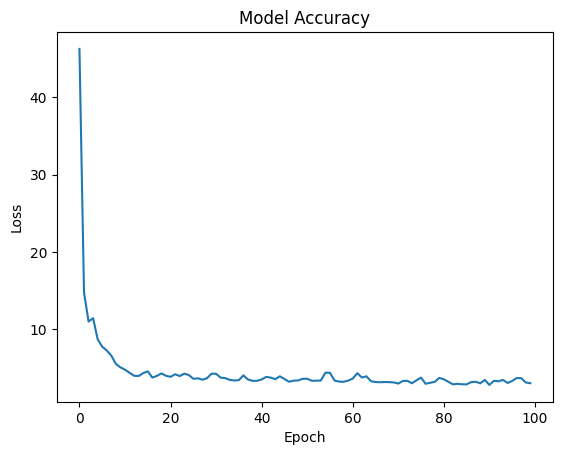

In [21]:
# Plot the training loss values
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [22]:
# Evaluate the model
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MAPE' %(trainScore))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MAPE' % (testScore))


Train Score: 3.23 MAPE
Test Score: 2.48 MAPE


In [23]:
# Predict the future 30 days
future_preds = []
if len(testX) >= 30:
    future_X = testX[-1]
    for i in range(30):
        future_pred = model.predict(future_X.reshape(1, 30))
        future_preds.append(future_pred[0])
        future_X = np.append(future_X[1:], future_pred)
  
else:
    print("Error: test_X doesn't have enough elements.")



1/1 [==============================] - 0s 21ms/step


In [24]:
#print 
for prediction in future_preds:
    print(prediction[0])

27509.734
27237.16
27025.504
26915.016
26594.016
26210.578
25943.193
25454.605
25265.348
25005.064
24604.104
24484.72
24112.49
23884.387
23474.48
23050.38
22936.406
22471.695
22411.766
22209.79
21894.715
21760.863
21452.754
21208.57
20984.094
20819.105
20651.953
20402.648
20223.023
20074.887


In [27]:
#print the price in INR
INR_ONE=82.69
INR_Prices=[INR_ONE*prediction[0] for prediction in future_preds]
for num in INR_Prices:
  print(round(num,2))

2274779.94
2252240.77
2234738.92
2225602.64
2199059.15
2167352.71
2145242.66
2104841.33
2089191.6
2067668.78
2034513.32
2024641.55
1993861.82
1974999.94
1941104.79
1906035.99
1896611.43
1858184.49
1853228.9
1836527.46
1810473.97
1799405.78
1773928.22
1753736.68
1735174.71
1721531.83
1707710.0
1687095.0
1672241.81
1659992.38
